# A/B Testing

In [414]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [415]:
df1=pd.read_csv('control_group.csv',sep=';')

In [416]:
df2=pd.read_csv('test_group.csv',sep=';')

In [417]:
df1.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [420]:
df2.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [421]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [422]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


### Cleaning

In [423]:
df1.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Number of Website Clicks", 
                        "Number of Searches Received", "Number of View Content", "Number of Add to Cart",
                        "Number of Purchases"]
df2.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Number of Website Clicks", 
                        "Number of Searches Received", "Number of View Content", "Number of Add to Cart",
                        "Number of Purchases"]

In [424]:
df1.isnull().sum()

Campaign Name                  0
Date                           0
Amount Spent                   0
Number of Impressions          1
Reach                          1
Number of Website Clicks       1
Number of Searches Received    1
Number of View Content         1
Number of Add to Cart          1
Number of Purchases            1
dtype: int64

In [425]:
df2.isnull().sum()

Campaign Name                  0
Date                           0
Amount Spent                   0
Number of Impressions          0
Reach                          0
Number of Website Clicks       0
Number of Searches Received    0
Number of View Content         0
Number of Add to Cart          0
Number of Purchases            0
dtype: int64

In [426]:
df1['Number of Impressions'].fillna(value=df1['Number of Impressions'].mean(),inplace=True)
df1['Reach'].fillna(value=df1['Reach'].mean(),inplace=True)
df1['Number of Website Clicks'].fillna(value=df1['Number of Website Clicks'].mean(),inplace=True)
df1['Number of Searches Received'].fillna(value=df1['Number of Searches Received'].mean(),inplace=True)
df1['Number of View Content'].fillna(value=df1['Number of View Content'].mean(),inplace=True)
df1['Number of Add to Cart'].fillna(value=df1['Number of Add to Cart'].mean(),inplace=True)
df1['Number of Purchases'].fillna(value=df1['Number of Purchases'].mean(),inplace=True)

In [427]:
df1['Date']=pd.to_datetime(df1['Date'])
df2['Date']=pd.to_datetime(df2['Date'])

In [428]:
print(" Describe Of Control Data")
df1.describe().transpose()

 Describe Of Control Data


,count,mean,std,min,25%,50%,75%,max
Amount Spent,30.0,2288.433333,367.334451,1757.0,1945.50,2299.500000,2532.00,3083.0
Number of Impressions,30.0,109559.758621,21311.695472,71274.0,95191.25,112368.000000,121259.00,145248.0
Reach,30.0,88844.931034,21452.627592,42859.0,75300.25,91418.000000,101958.75,127852.0
Number of Website Clicks,30.0,5320.793103,1726.803732,2277.0,4122.25,5272.396552,6609.50,8137.0
Number of Searches Received,30.0,2221.310345,851.025795,1001.0,1629.25,2340.000000,2655.00,4891.0
Number of View Content,30.0,1943.793103,764.021907,848.0,1249.00,1979.500000,2360.50,4219.0
Number of Add to Cart,30.0,1300.000000,400.371207,442.0,942.50,1319.500000,1638.00,1913.0
Number of Purchases,30.0,522.793103,181.810508,222.0,375.50,506.000000,663.25,800.0


In [429]:
print(" Describe Of Test Data")
df2.describe().transpose()

 Describe Of Test Data


,count,mean,std,min,25%,50%,75%,max
Amount Spent,30.0,2563.066667,348.687681,1968.0,2324.50,2584.0,2836.25,3112.0
Number of Impressions,30.0,74584.800000,32121.377422,22521.0,47541.25,68853.5,99500.00,133771.0
Reach,30.0,53491.566667,28795.775752,10598.0,31516.25,44219.5,78778.75,109834.0
Number of Website Clicks,30.0,6032.333333,1708.567263,3038.0,4407.00,6242.5,7604.75,8264.0
Number of Searches Received,30.0,2418.966667,388.742312,1854.0,2043.00,2395.5,2801.25,2978.0
Number of View Content,30.0,1858.000000,597.654669,858.0,1320.00,1881.0,2412.00,2801.0
Number of Add to Cart,30.0,881.533333,347.584248,278.0,582.50,974.0,1148.50,1391.0
Number of Purchases,30.0,521.233333,211.047745,238.0,298.00,500.0,701.00,890.0


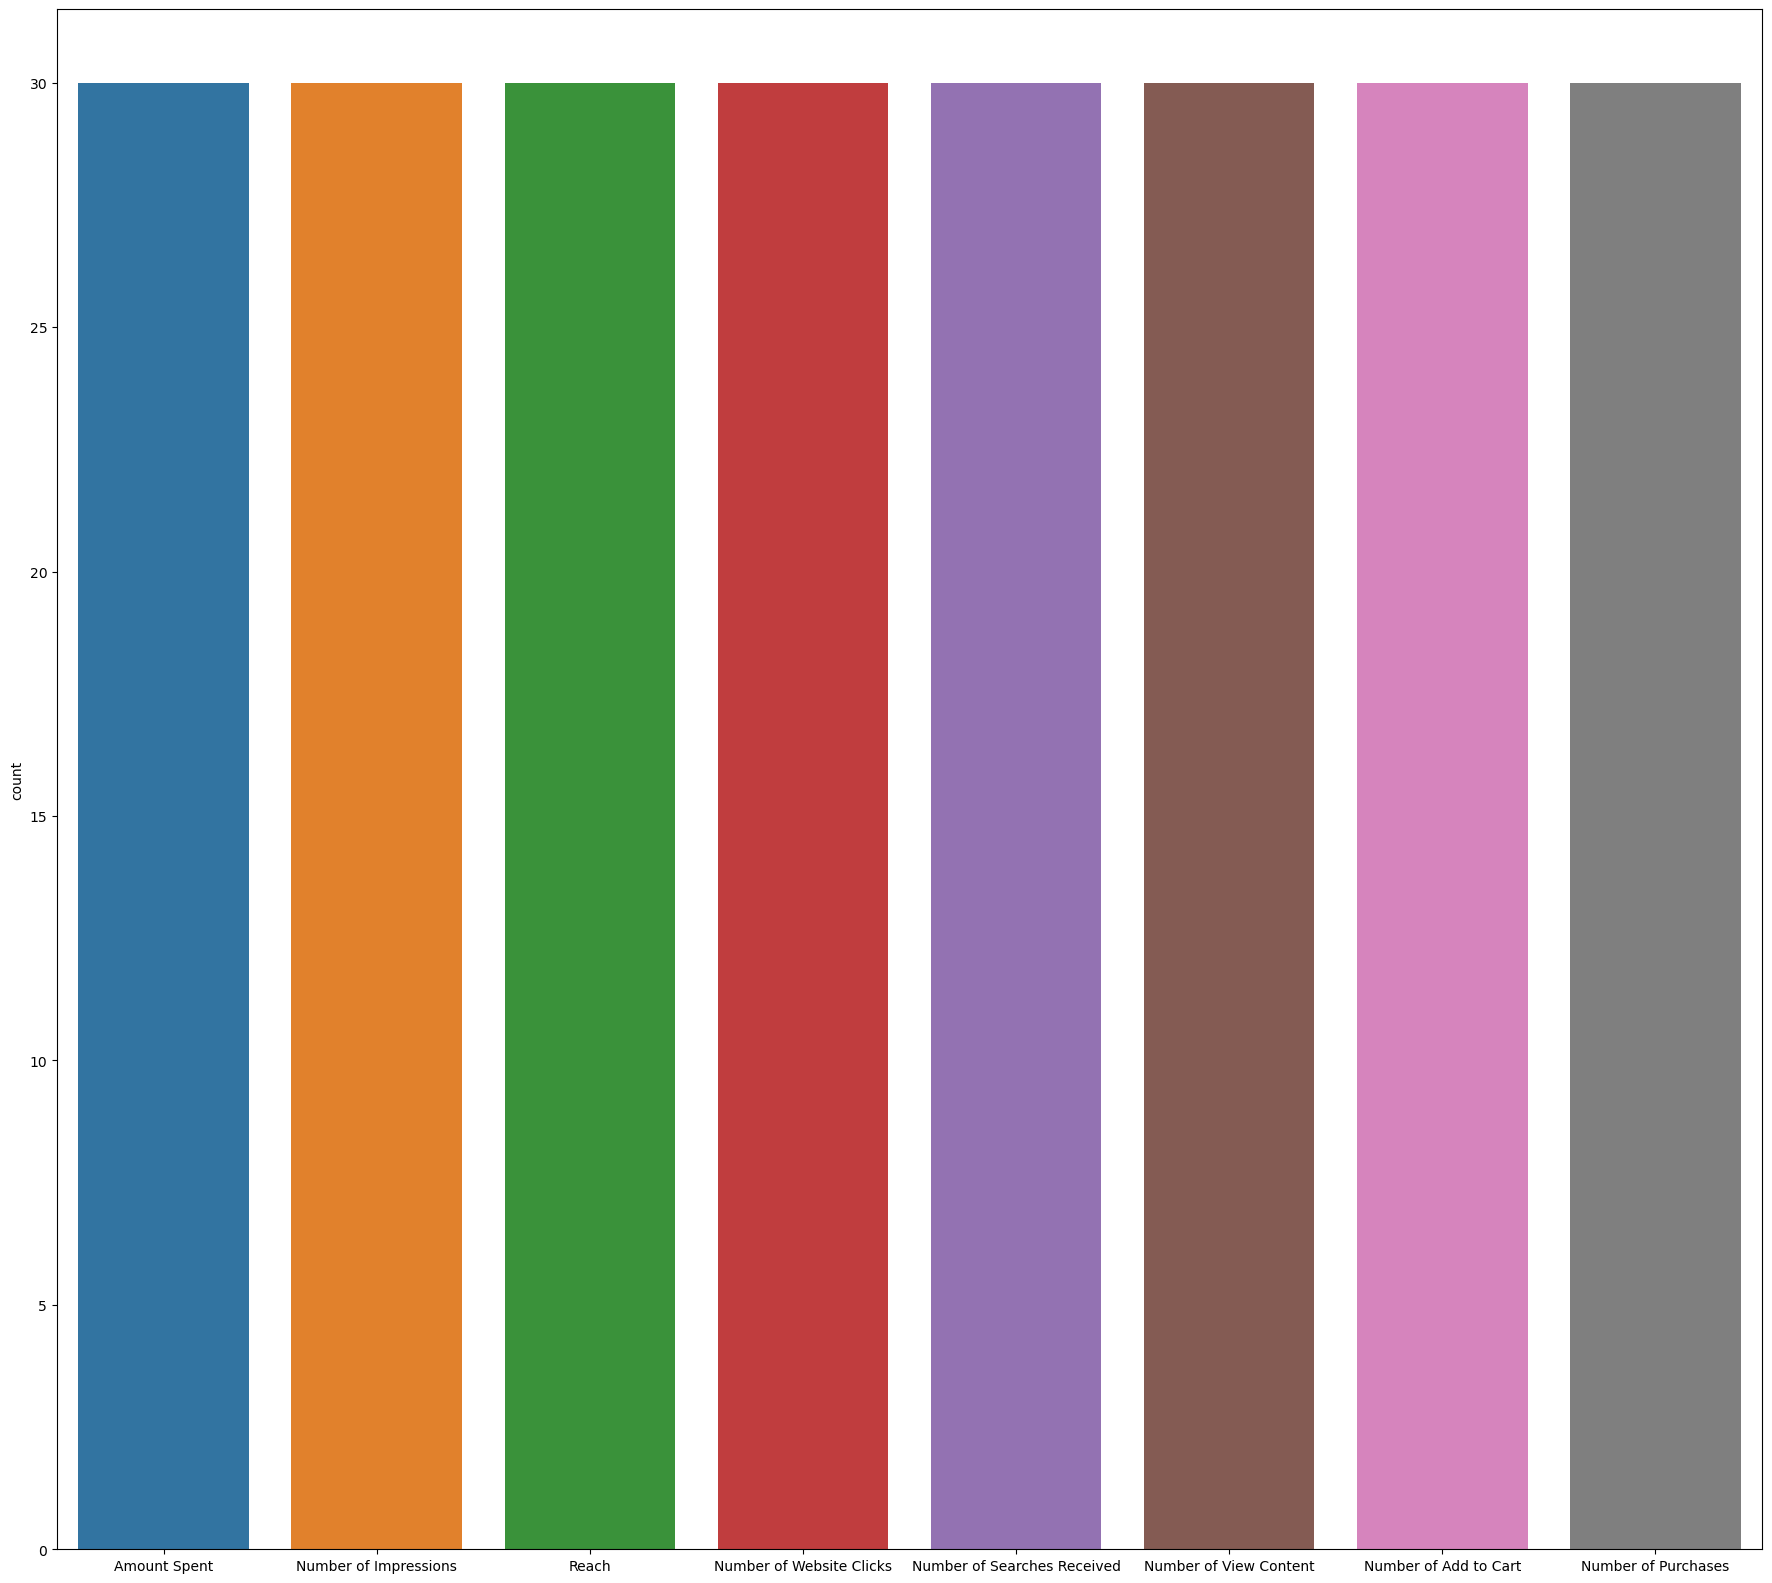

In [430]:
plt.figure(figsize=(22,20))
sns.countplot(data=df1)
plt.show()

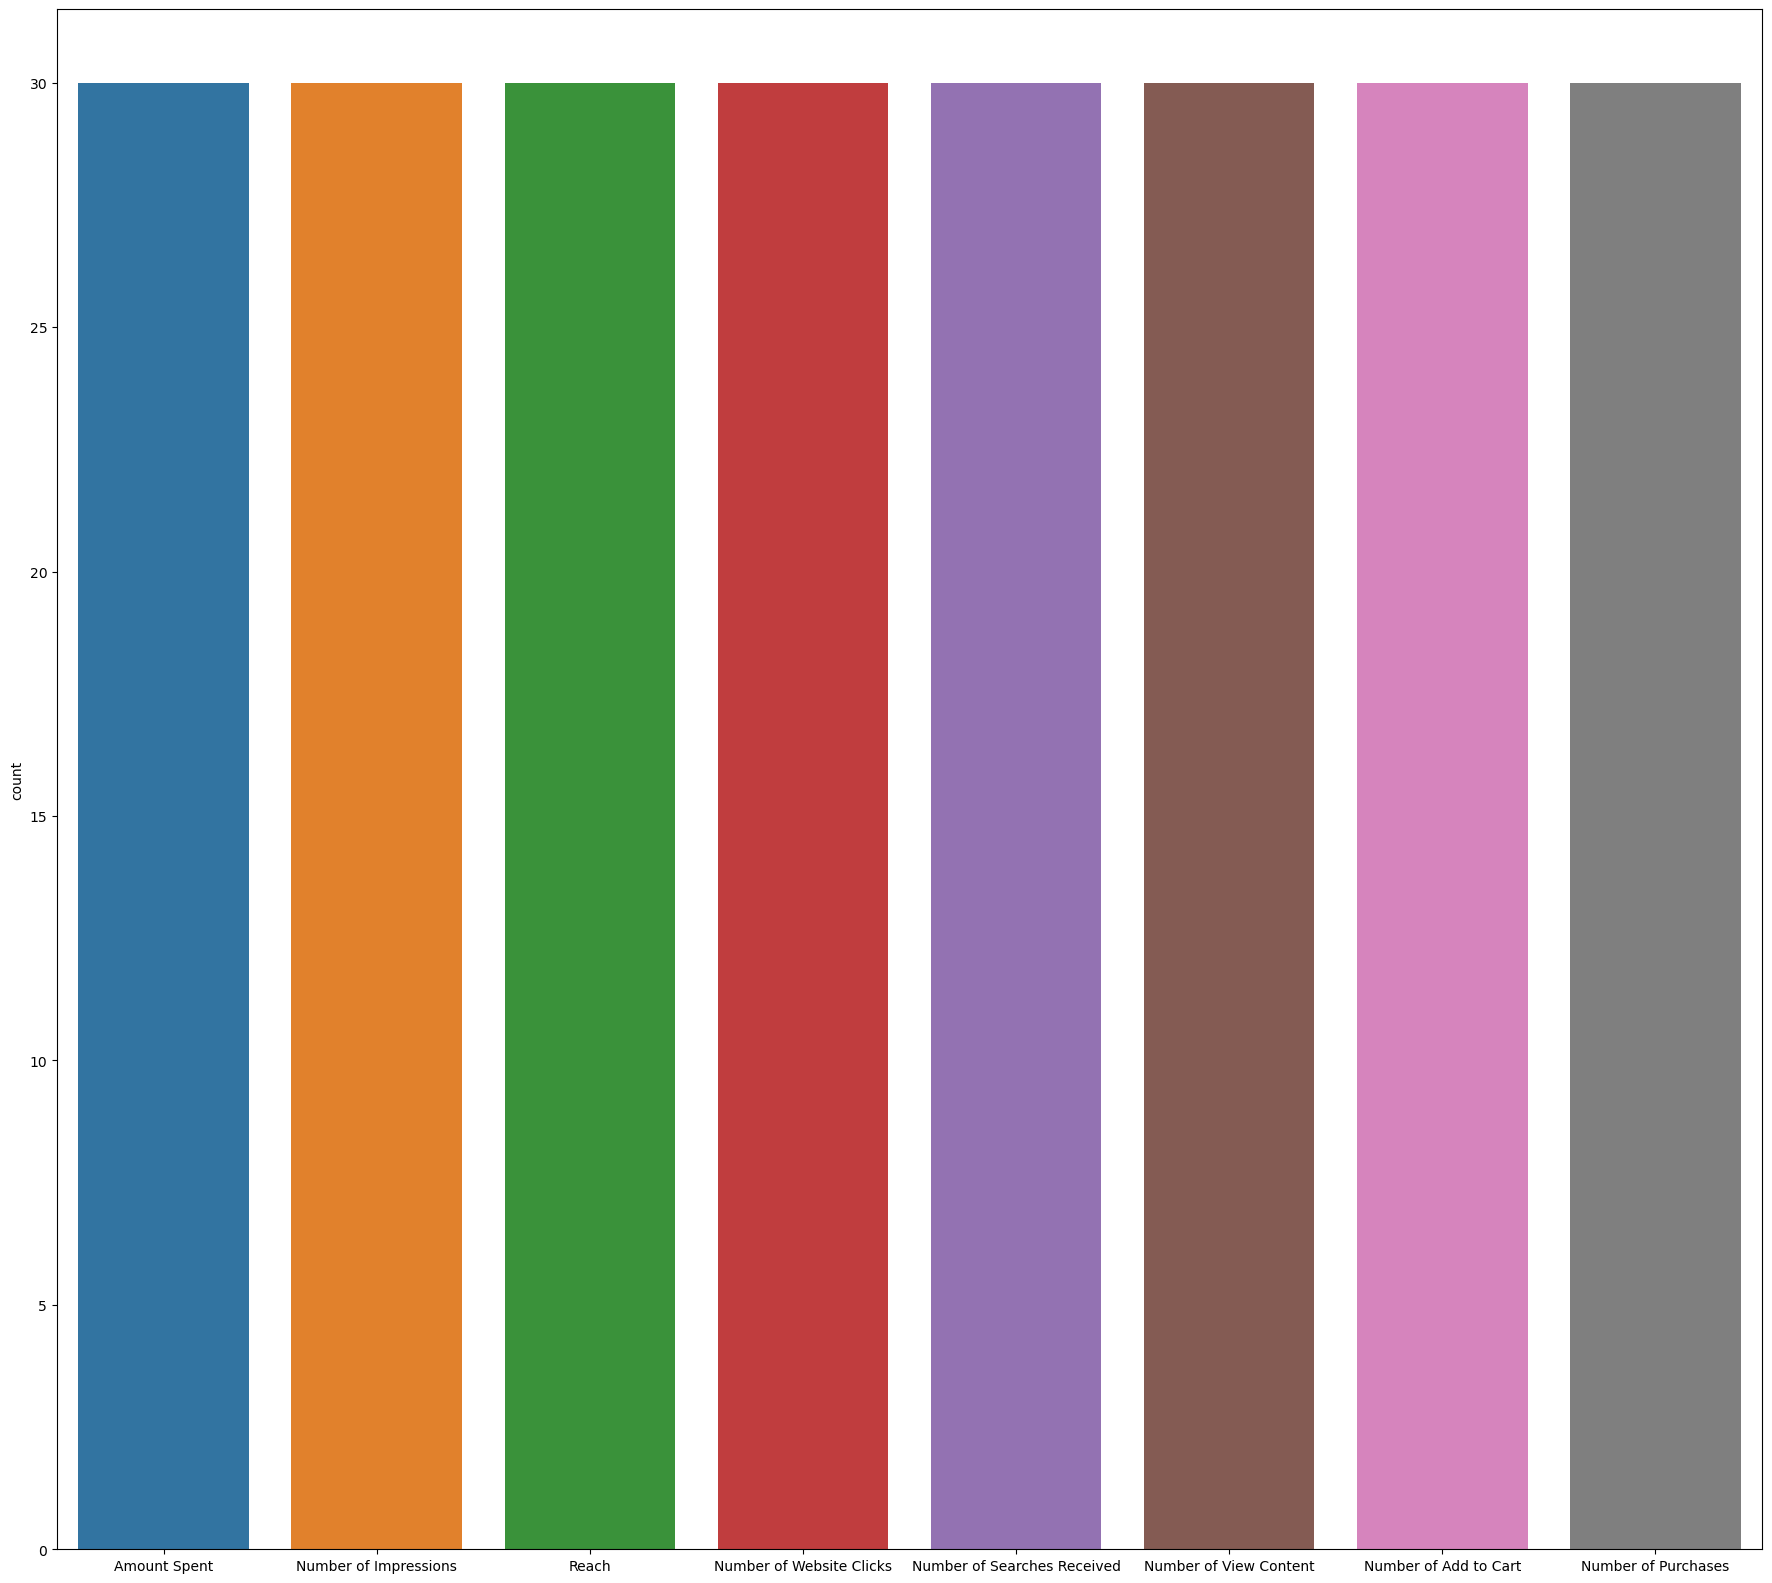

In [431]:
plt.figure(figsize=(22,20))
sns.countplot(data=df2)
plt.show()

In [432]:
df1.compare(df2)

Campaign Name                Amount Spent       Number of Impressions  \
                self          other         self other                  self   
0   Control Campaign  Test Campaign         2280  3008          82702.000000   
1   Control Campaign  Test Campaign         1757  2542         121040.000000   
2   Control Campaign  Test Campaign         2343  2365         131711.000000   
3   Control Campaign  Test Campaign         1940  2710          72878.000000   
4   Control Campaign  Test Campaign         1835  2297         109559.758621   
5   Control Campaign  Test Campaign         3083  2458         109076.000000   
6   Control Campaign  Test Campaign         2544  2838         142123.000000   
7   Control Campaign  Test Campaign         1900  2916          90939.000000   
8   Control Campaign  Test Campaign         2813  2652         121332.000000   
9   Control Campaign  Test Campaign         2149  2790         117624.000000   
10  Control Campaign  Test Campaign         2490  2420         115247.000000   
11  Control Campaign  Test Campaign         2319  2831         116639.000000   
12  Control Campaign  Test Campaign         2697  1972          82847.000000   
13  Control Campaign  Test Campaign         1875  2537         145248.000000   
14  Control Campaign  Test Campaign         2774  2516         132845.000000   
15  Control Campaign  Test Campaign         2024  3076          71274.000000   
16  Control Campaign  Test Campaign         2177  1968         119612.000000   
17  Control Campaign  Test Campaign         1876  1979         108452.000000   
18  Control Campaign  Test Campaign         2596  2626         107890.000000   
19  Control Campaign  Test Campaign         2675  2712         113430.000000   
20  Control Campaign  Test Campaign         1803  3112          74654.000000   
21  Control Campaign  Test Campaign         2939  2899         105705.000000   
22  Control Campaign  Test Campaign         2496  2407         129880.000000   
23  Control Campaign  Test Campaign         1892  2078          72515.000000   
24  Control Campaign  Test Campaign         1962  2928         117006.000000   
25  Control Campaign  Test Campaign         2233  2311         124897.000000   
26  Control Campaign  Test Campaign         2061  2915         104678.000000   
27  Control Campaign  Test Campaign         2421  2247         141654.000000   
28  Control Campaign  Test Campaign         2375  2805          92029.000000   
29  Control Campaign  Test Campaign         2324  1977         111306.000000   

                    Reach         Number of Website Clicks        \
     other           self   other                     self other   
0    39550   56930.000000   35820              7016.000000  3038   
1   100719  102513.000000   91236              8110.000000  4657   
2    70263  110862.000000   45198              6508.000000  7885   
3    78451   61235.000000   25937              3065.000000  4216   
4   114295   88844.931034   95138              5320.793103  5863   
5    42684   87998.000000   31489              4028.000000  7488   
6    53986  127852.000000   42148              2640.000000  4221   
7    33669   65217.000000   20149              7260.000000  7184   
8    45511   94896.000000   31598              6198.000000  8259   
9    95054   91257.000000   79632              2277.000000  8125   
10   83633   95843.000000   71286              8137.000000  3750   
11  124591  100189.000000   10598              2993.000000  8264   
12   65827   68214.000000   49531              6554.000000  7568   
13   56304  118632.000000   25982              4521.000000  3993   
14   94338  102479.000000   76219              4896.000000  4993   
15  106584   42859.000000   81389              5224.000000  6800   
16   95843  106518.000000   54389              6628.000000  7910   
17   53632   96518.000000   43241              7253.000000  6909   
18   22521   81268.000000   10698              3706.000000  7617   
19   39470   78625

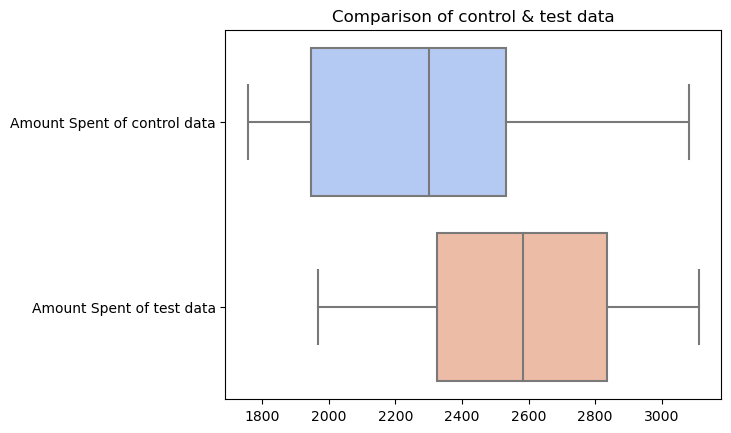

In [433]:
combined_df = pd.concat([df1['Amount Spent'], df2['Amount Spent']], axis=1)
combined_df.columns = ['Amount Spent of control data', 'Amount Spent of test data']
sns.boxplot(data=combined_df,palette='coolwarm',orient='h')
plt.title('Comparison of control & test data')
plt.show()

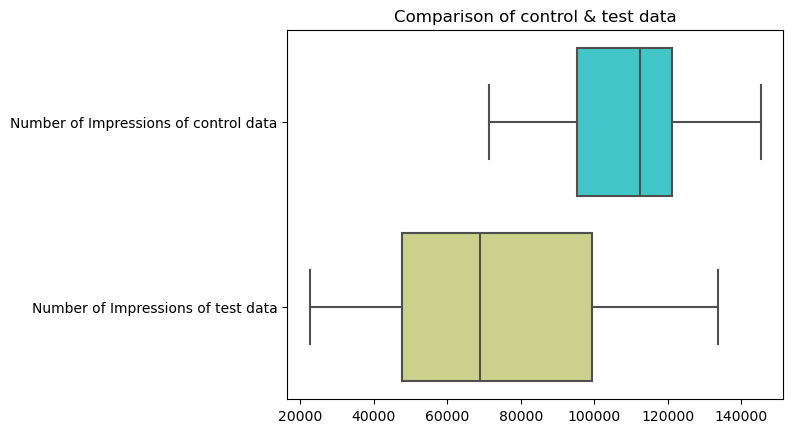

In [434]:
combined_df = pd.concat([df1['Number of Impressions'], df2['Number of Impressions']], axis=1)
combined_df.columns = ['Number of Impressions of control data', 'Number of Impressions of test data']
sns.boxplot(data=combined_df,palette='rainbow',orient='h')
plt.title('Comparison of control & test data')
plt.show()

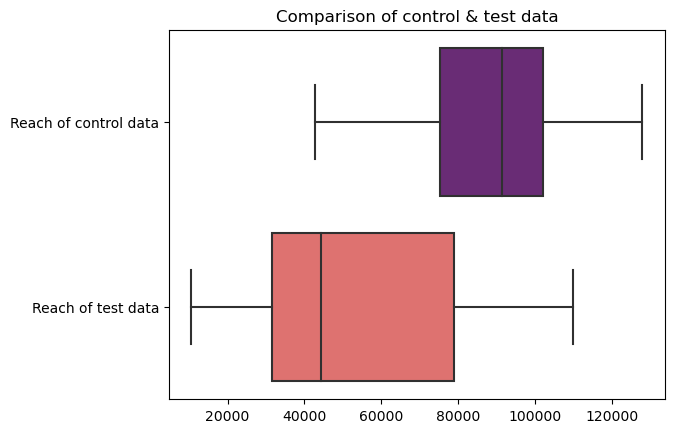

In [435]:
combined_df = pd.concat([df1['Reach'], df2['Reach']], axis=1)
combined_df.columns = ['Reach of control data', 'Reach of test data']
sns.boxplot(data=combined_df,palette='magma',orient='h')
plt.title('Comparison of control & test data')
plt.show()

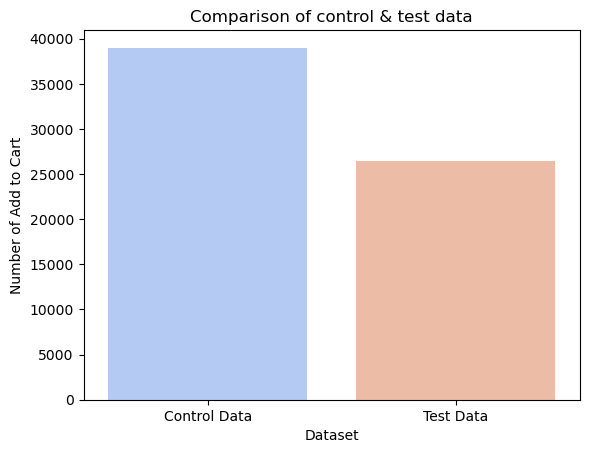

In [436]:
control_total_spent = df1['Number of Add to Cart'].sum()
test_total_spent = df2['Number of Add to Cart'].sum()
combined_df = pd.DataFrame({'Number of Add to Cart': [control_total_spent, test_total_spent]},
                           index=['Control Data', 'Test Data'])
sns.barplot(x=combined_df.index, y='Number of Add to Cart', data=combined_df, palette='coolwarm')
plt.xlabel('Dataset')
plt.ylabel('Number of Add to Cart')
plt.title('Comparison of control & test data')
plt.show()

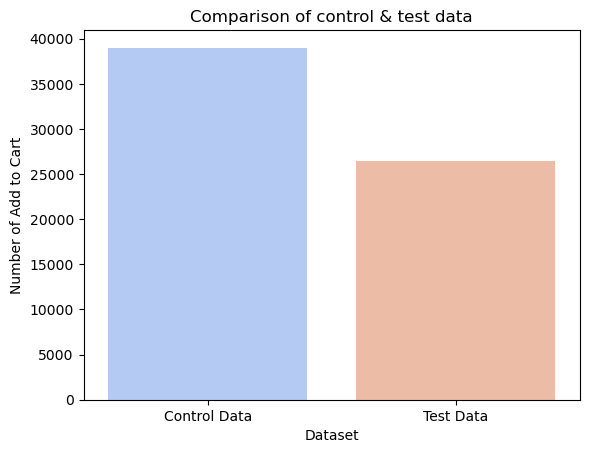

In [437]:
control_total_spent = df1['Number of Add to Cart'].sum()
test_total_spent = df2['Number of Add to Cart'].sum()
combined_df = pd.DataFrame({'Number of Add to Cart': [control_total_spent, test_total_spent]},
                           index=['Control Data', 'Test Data'])
sns.barplot(x=combined_df.index, y='Number of Add to Cart', data=combined_df, palette='coolwarm')
plt.xlabel('Dataset')
plt.ylabel('Number of Add to Cart')
plt.title('Comparison of control & test data')
plt.show()

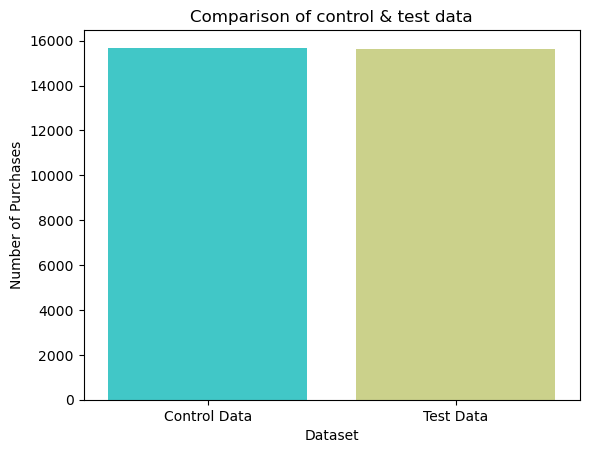

In [438]:
control_total_spent = df1['Number of Purchases'].sum()
test_total_spent = df2['Number of Purchases'].sum()
combined_df = pd.DataFrame({'Number of Purchases': [control_total_spent, test_total_spent]},
                           index=['Control Data', 'Test Data'])
sns.barplot(x=combined_df.index, y='Number of Purchases', data=combined_df, palette='rainbow')
plt.xlabel('Dataset')
plt.ylabel('Number of Purchases')
plt.title('Comparison of control & test data')
plt.show()

In [439]:
df3=df1.merge(df2,how="outer")

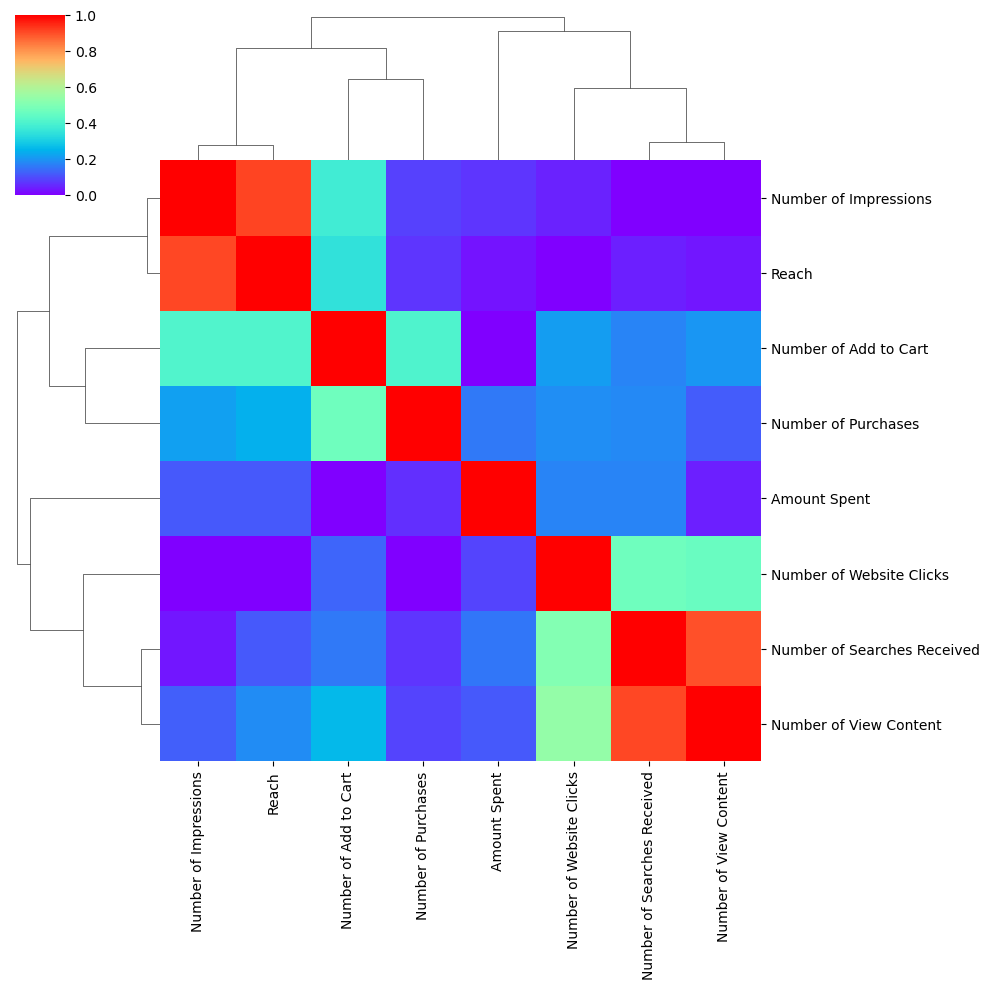

In [440]:
sns.clustermap(df3.corr(),cmap='rainbow',standard_scale=1)
plt.show()

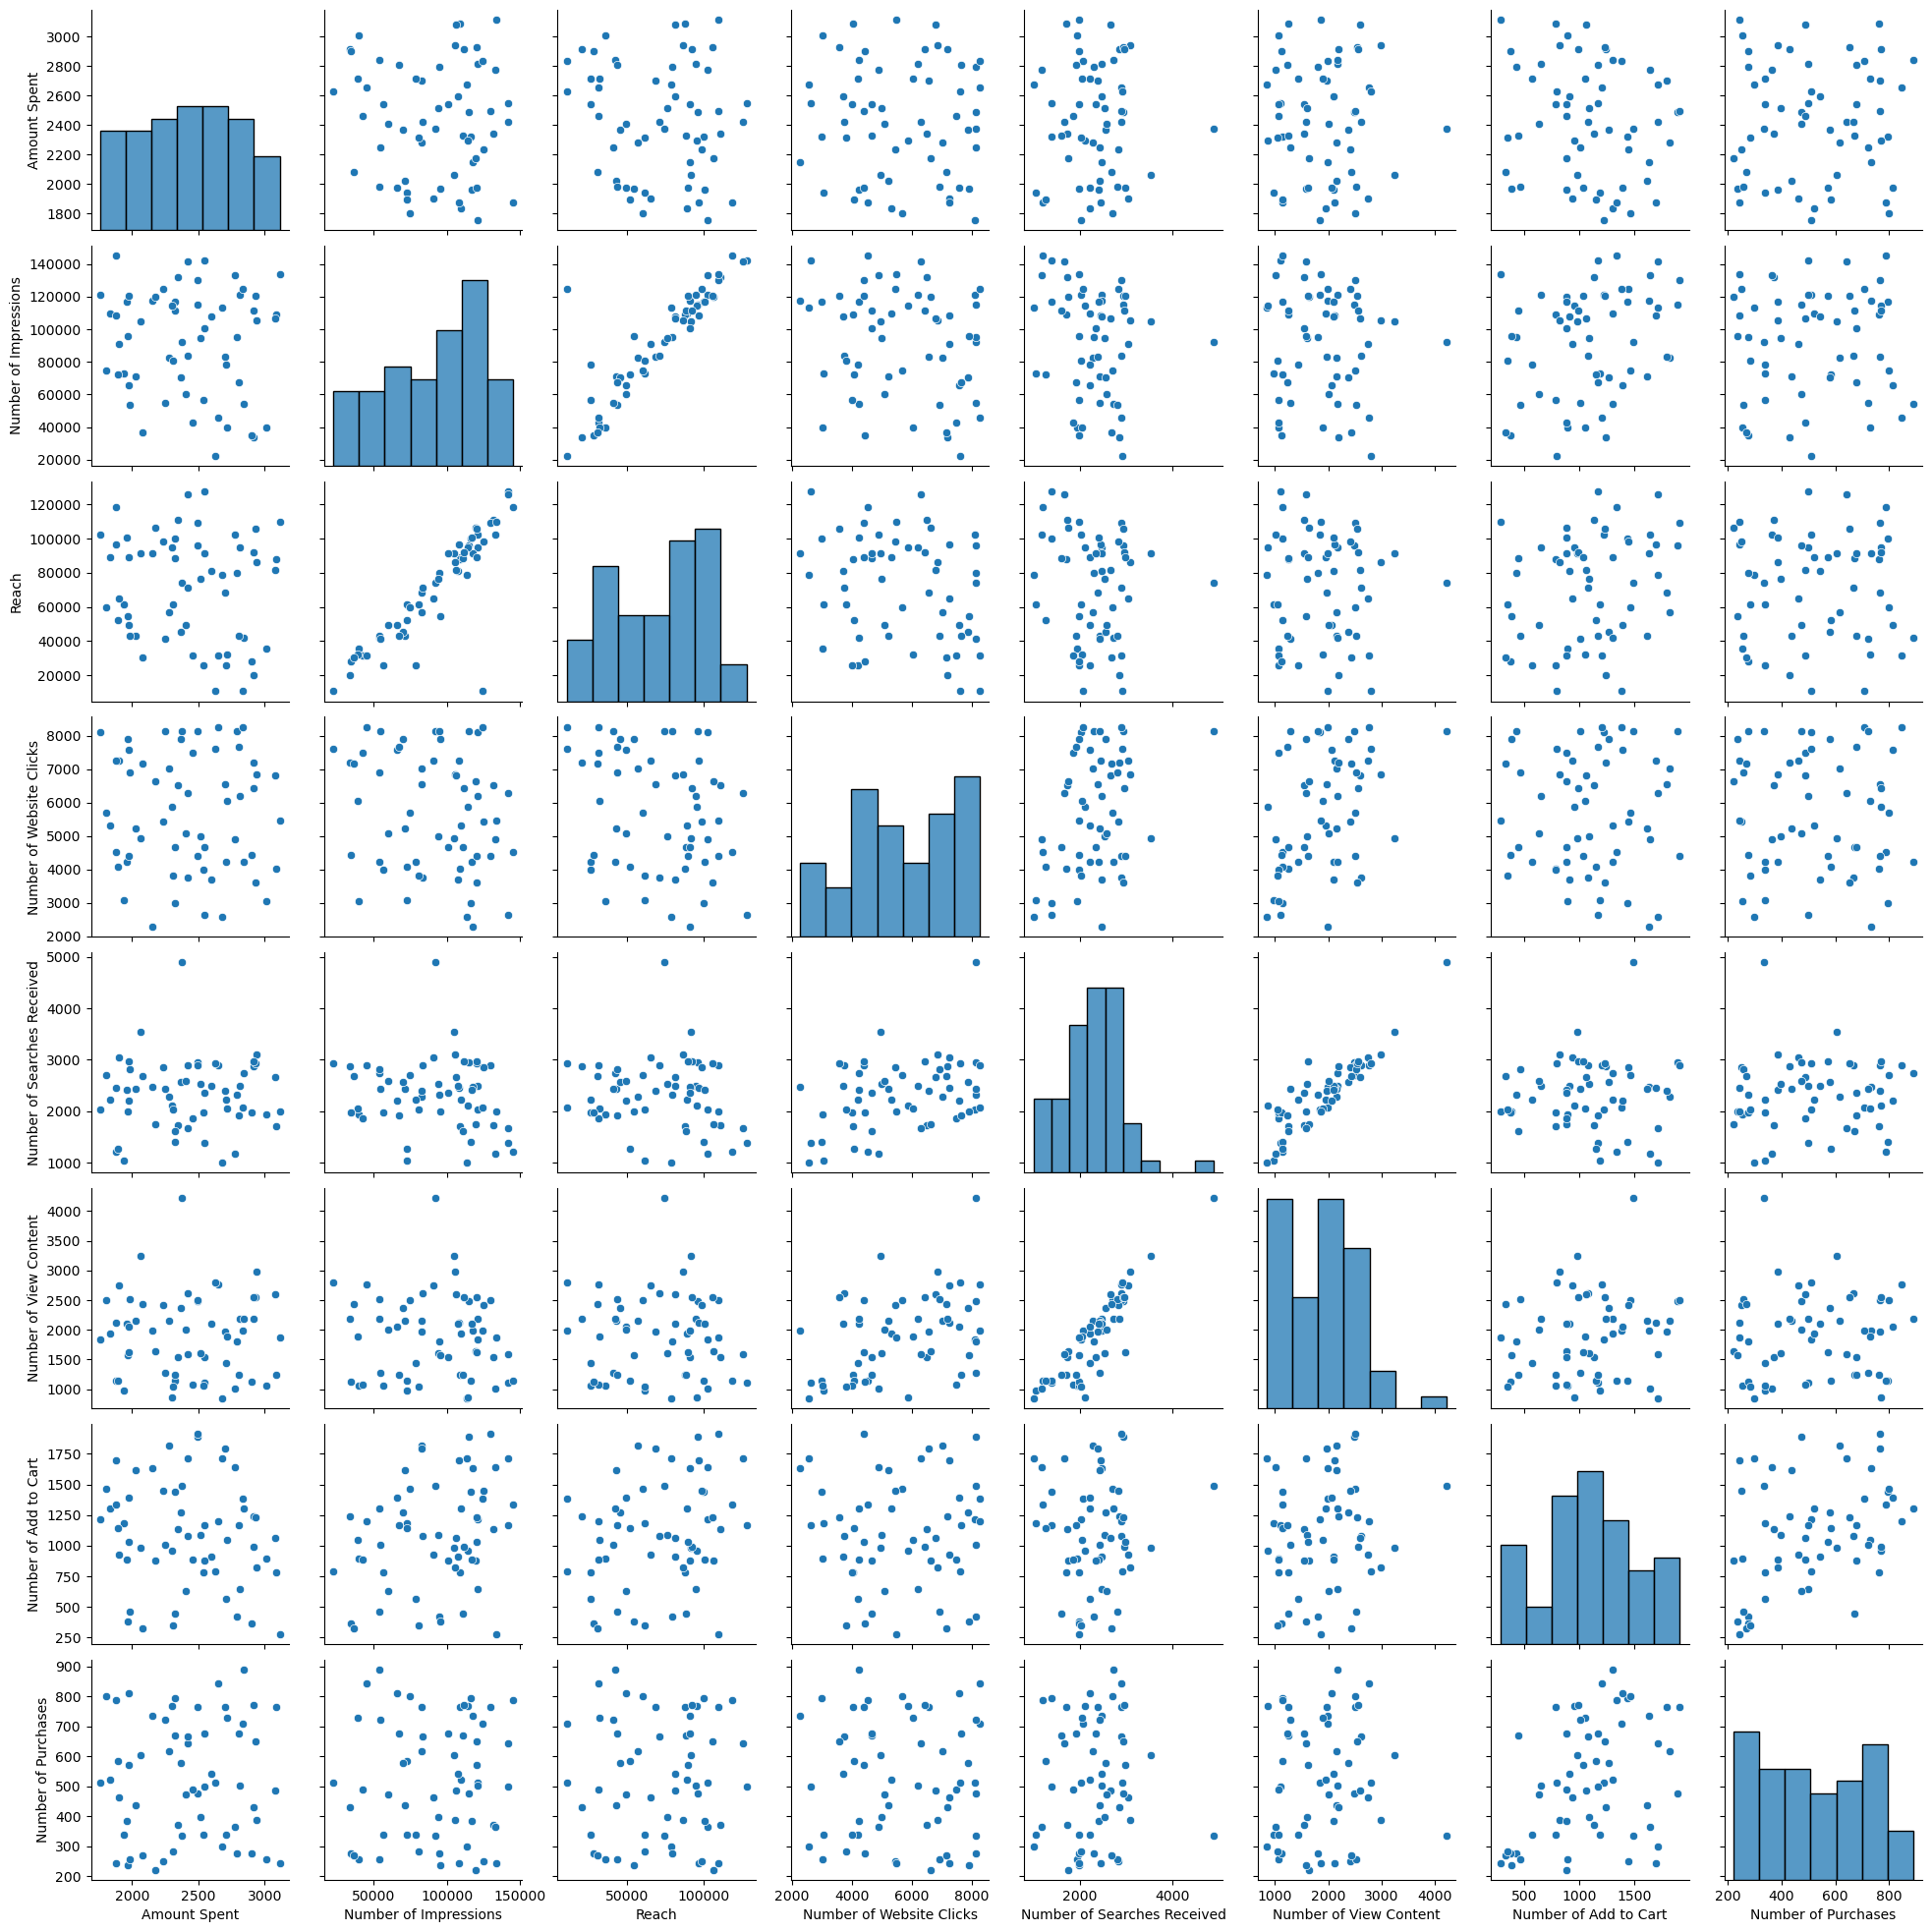

In [441]:
sns.pairplot(df3)
plt.show()

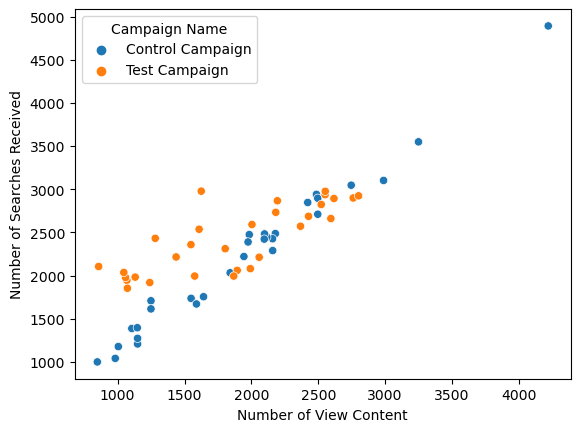

In [442]:
sns.scatterplot(x='Number of View Content',y='Number of Searches Received',data=df3,hue='Campaign Name')
plt.show()

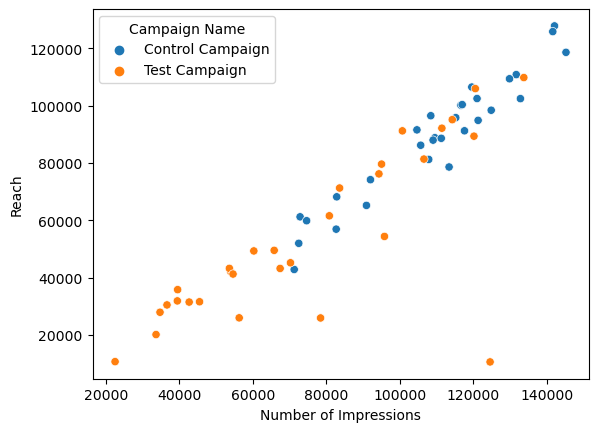

In [443]:
sns.scatterplot(x='Number of Impressions',y='Reach',data=df3,hue='Campaign Name')
plt.show()

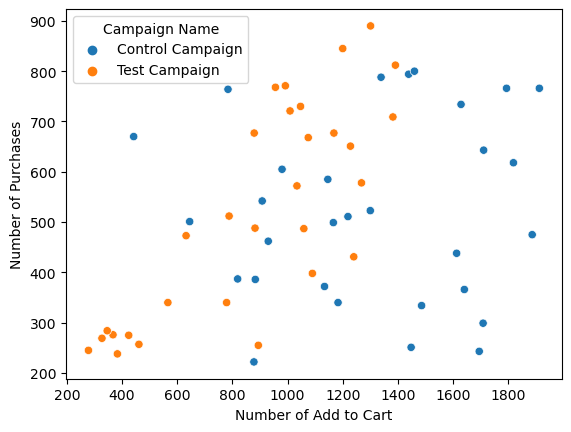

In [444]:
sns.scatterplot(x='Number of Add to Cart',y='Number of Purchases',data=df3,hue='Campaign Name')
plt.show()